In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [19]:
dropped_features = ['fg3a_per_g', 'mp_per_g', 'ast_pct', 'fta_per_g', 'fg2a_per_g', 
                    'fg3a_per_g', 'fg_per_g', 'orb_pct', 'drb_pct', 'blk_pct', 'drb_per_g',
                    'fga_per_g', 'trb_pct', 'ws_per_48', 'stl_pct', 'obpm', 'dbpm', 'usg_pct',
                    'age', 'ts_pct', 'dws', 'bpm', 'fg_pct', 'fg2_pct', 'ft_per_g',
                    'orb_per_g', 'tov_pct', 'fg3a_per_fga_pct', 'fg2_per_g', 'gs', 'ws', 'fta_per_fga_pct']

In [36]:
#get data and filter from 2012 forward, we only have award share data from 2012
data = pd.read_csv('data/rookie_full_total_seasons.csv')
data = data.drop(columns=['Unnamed: 0'])
rookies = data.fillna(0.0)
rookies = rookies.drop(columns=dropped_features)
subset_rookies = rookies[rookies['season'] >= 2012]
pca_prep = subset_rookies.drop(columns=['player', 'team_id', 'pos', 'svm_distance', 'first', 'share'])
subset_rookies.columns

Index(['player', 'pos', 'team_id', 'g', 'fg3_per_g', 'fg3_pct', 'efg_pct',
       'ft_pct', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g',
       'tov_per_g', 'pf_per_g', 'pts_per_g', 'mp', 'per', 'vorp', 'season',
       'experience', 'svm_distance', 'norm_svm_dist_score', 'first', 'share',
       'pca_distance'],
      dtype='object')

In [21]:
awards = pd.read_csv('data/AwardVoteShare_2012-2024.csv')
df8 = awards[(awards['Award'] == 'ROTY')]
# df8.groupby('Year').max()
roty = df8.loc[df8.groupby('Year')['Share'].idxmax()]
roty_winners = roty['Player']
roty_winners


563             Damian Lillard
503    Michael Carter-Williams
446             Andrew Wiggins
389         Karl-Anthony Towns
347            Malcolm Brogdon
297                Ben Simmons
251                Luka Dončić
210                  Ja Morant
167                LaMelo Ball
122             Scottie Barnes
68              Paolo Banchero
9            Victor Wembanyama
Name: Player, dtype: object

In [22]:
# label 1 for players that have received the award
roty_target = [1 if roty_winners.isin([player]).sum() > 0 else 0 for player in subset_rookies['player'] ]

In [23]:
pca = PCA(n_components=2)
scaler = StandardScaler()
pca_prep = scaler.fit_transform(pca_prep)
pca_data = pca.fit_transform(pca_prep)
name_list = [player if (pca_data[:,0][i] > 8) or (pca_data[:,1][i] > 8) else " " for i, player in enumerate(subset_rookies['player'])]

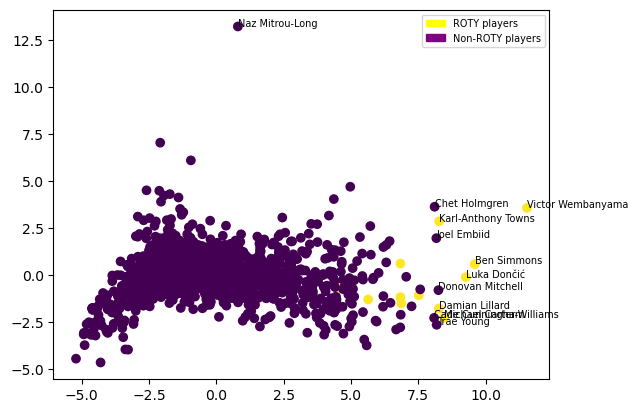

In [24]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=roty_target)
for i, txt in enumerate(name_list):
    plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]), fontsize=7)
yellow_patch = mpatches.Patch(color='yellow', label='ROTY players')
purple_patch = mpatches.Patch(color='purple', label='Non-ROTY players')
plt.legend(handles=[yellow_patch, purple_patch], loc='upper right', fontsize=7)

# SVD Deconstruction

In [25]:
sigma1, sigma2 = pca.singular_values_
U1 = pca_data[:,0] / sigma1
U2 = pca_data[:,1] / sigma2

In [26]:
U1

array([ 0.0020037 ,  0.02849443, -0.04783194, ...,  0.02585761,
        0.04137897,  0.12906322])

In [27]:
pca_data[:,0]

array([ 0.17899384,  2.54545563, -4.27290855, ...,  2.30990486,
        3.69645378, 11.5294375 ])

In [28]:
pca_dists = []
for i in range(len(pca_data)):
    vector = np.array([U1[i], U2[i]])
    dist = np.linalg.norm(vector)
    pca_dists.append(dist)
    


In [29]:
subset_rookies['pca_distance'] = pca_dists
subset_rookies

/var/folders/kk/xndsxk6n7js53cqtn6q1fjkm0000gn/T/ipykernel_832/471195929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rookies['pca_distance'] = pca_dists


,player,pos,team_id,g,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,...,mp,per,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
1865,Lavoy Allen,PF,PHI,41.0,0.0,0.000,0.473,0.786,4.2,0.8,...,624.0,12.7,0.0,2012,1,0.0,0.0,0.0,0.0,0.010537
1866,Gustavo Ayón,PF,NOH,54.0,0.0,0.000,0.536,0.619,4.9,1.4,...,1088.0,16.7,1.2,2012,1,0.0,0.0,0.0,0.0,0.040469
1867,Keith Benson,C,GSW,3.0,0.0,0.000,0.000,0.000,1.0,0.0,...,9.0,6.0,0.0,2012,1,0.0,0.0,0.0,0.0,0.057485
1868,Bismack Biyombo,C,CHA,63.0,0.0,0.000,0.464,0.483,5.8,0.4,...,1455.0,10.6,-1.0,2012,1,0.0,0.0,0.0,0.0,0.024846
1869,MarShon Brooks,SG,NJN,56.0,0.8,0.313,0.465,0.764,3.6,2.3,...,1648.0,12.9,-0.2,2012,1,0.0,0.0,0.0,0.0,0.051112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,Toumani Camara,PF,POR,70.0,0.8,0.337,0.516,0.758,4.9,1.2,...,1739.0,10.6,-0.5,2024,1,0.0,0.0,0.0,0.0,0.038442
3075,Trayce Jackson-Davis,PF,GSW,68.0,0.0,0.000,0.702,0.561,5.0,1.2,...,1130.0,21.6,1.4,2024,1,0.0,0.0,0.0,0.0,0.071659
3076,Trey Jemison,C,WAS,25.0,0.0,0.000,0.551,0.840,5.8,1.2,...,572.0,11.9,0.0,2024,1,0.0,0.0,0.0,0.0,0.034239
3077,Vasilije Micić,PG,OKC,60.0,1.1,0.294,0.495,0.839,2.1,6.2,...,815.0,11.9,-0.3,2024,1,0.0,0.0,0.0,0.0,0.060590


In [30]:
subset_rookies[subset_rookies['pca_distance'] > 0.1]

,player,pos,team_id,g,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,...,mp,per,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
1984,Damian Lillard,PG,POR,82.0,2.3,0.368,0.501,0.844,3.1,6.5,...,3167.0,16.4,1.8,2013,1,0.0,0.0,0.0,0.0,0.100153
2033,Michael Carter-Williams,PG,PHI,70.0,0.8,0.264,0.431,0.703,6.2,6.3,...,2414.0,15.5,0.9,2014,1,0.0,0.0,0.0,0.0,0.106813
2151,Eric Moreland,PF,SAC,3.0,0.0,0.000,1.000,0.000,0.3,0.0,...,2.0,40.8,0.0,2015,1,0.0,0.0,0.0,0.0,0.101825
2243,Karl-Anthony Towns,C,MIN,82.0,0.4,0.341,0.555,0.811,10.5,2.0,...,2627.0,22.5,2.7,2016,1,0.0,0.0,0.0,0.0,0.111327
2272,Joel Embiid,C,PHI,31.0,1.2,0.367,0.508,0.783,7.8,2.1,...,786.0,24.1,1.3,2017,1,0.0,0.0,0.0,0.0,0.100789
2414,Naz Mitrou-Long,SG,UTA,1.0,1.0,1.000,1.500,0.000,0.0,0.0,...,1.0,133.8,0.0,2018,1,0.0,0.0,0.0,0.0,0.286603
2437,Ben Simmons,PG,PHI,81.0,0.0,0.000,0.545,0.560,8.1,8.2,...,2732.0,20.0,4.5,2018,1,0.0,0.0,0.0,0.0,0.108087
2494,Luka Dončić,SG,DAL,72.0,2.3,0.327,0.497,0.713,7.8,6.0,...,2318.0,19.6,3.4,2019,1,0.0,0.0,0.0,0.0,0.103685
2505,Donte Grantham,SF,OKC,3.0,0.0,0.000,0.000,0.000,0.0,0.0,...,2.0,-38.1,0.0,2019,1,0.0,0.0,0.0,0.0,0.112726
2539,Mitchell Robinson,C,NYK,66.0,0.0,0.000,0.694,0.600,6.4,0.6,...,1360.0,22.0,1.6,2019,1,0.0,0.0,0.0,0.0,0.100207


In [32]:
subset_rookies['pca_distance']

1865    0.010537
1866    0.040469
1867    0.057485
1868    0.024846
1869    0.051112
          ...   
3074    0.038442
3075    0.071659
3076    0.034239
3077    0.060590
3078    0.150437
Name: pca_distance, Length: 1214, dtype: float64

In [34]:
data['pca_distance'] = subset_rookies['pca_distance']

In [35]:
data

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
0,Ken Austin,SF,22.0,DET,7.0,0.0,4.0,0.9,1.9,0.462,...,-0.2,-4.9,0.0,1984,1,NaN,NaN,NaN,NaN,NaN
1,Thurl Bailey,PF,22.0,UTA,81.0,54.0,24.8,3.7,7.3,0.512,...,0.7,-0.5,0.8,1984,1,NaN,NaN,NaN,NaN,NaN
2,Tom Boswell,PF,30.0,UTA,38.0,0.0,6.9,0.7,1.4,0.538,...,-0.1,-3.1,-0.1,1984,1,NaN,NaN,NaN,NaN,NaN
3,Randy Breuer,C,23.0,MIL,57.0,8.0,8.3,1.2,3.1,0.384,...,0.5,-5.6,-0.4,1984,1,NaN,NaN,NaN,NaN,NaN
4,Wallace Bryant,C,24.0,CHI,29.0,0.0,10.9,1.8,4.6,0.391,...,-1.2,-5.4,-0.3,1984,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,Toumani Camara,PF,23.0,POR,70.0,49.0,24.8,2.8,6.3,0.450,...,0.0,-3.1,-0.5,2024,1,NaN,NaN,NaN,NaN,0.038442
3075,Trayce Jackson-Davis,PF,23.0,GSW,68.0,16.0,16.6,3.4,4.9,0.702,...,1.2,2.8,1.4,2024,1,NaN,NaN,NaN,NaN,0.071659
3076,Trey Jemison,C,24.0,WAS,25.0,14.0,24.9,3.3,5.9,0.551,...,-0.4,-5.1,0.0,2024,1,NaN,NaN,NaN,NaN,0.034239
3077,Vasilije Micić,PG,30.0,OKC,60.0,21.0,27.2,4.1,9.3,0.437,...,-1.4,-4.4,-0.3,2024,1,NaN,NaN,NaN,NaN,0.060590
